<a href="https://colab.research.google.com/github/ZahraDehghani99/ML_MSc/blob/main/HW4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home Work 4-2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/ML/HW4/X_train.csv', header=None)
X_train = X_train.rename(columns={0: 'feature1', 1: 'feature2'})
X_train.head()

,feature1,feature2
0,-51.018349,-140.474884
1,-52.245735,-161.329803
2,-80.484924,-230.444748
3,-72.035378,-224.272476
4,88.726608,281.428528


In [ ]:
y_train = pd.read_csv('/content/drive/MyDrive/ML/HW4/y_train.csv', header=None)
y_train = y_train.rename(columns={0: 'label'})
y_train['label'].replace(to_replace= 0, value = -1, inplace=True )
y_train.head()

,label
0,-1.0
1,1.0
2,-1.0
3,1.0
4,-1.0


In [ ]:
print(f'X_train shape : {X_train.shape}')
print(f'y_train shape : {y_train.shape}')

X_train shape : (128, 2)
y_train shape : (128, 1)


In [ ]:
X_test = pd.read_csv('/content/drive/MyDrive/ML/HW4/X_test.csv', header=None)
X_test = X_test.rename(columns={0: 'feature1', 1: 'feature2'})
X_test.head()

,feature1,feature2
0,-69.915527,-213.608887
1,-33.775467,-90.481079
2,-0.511487,13.408105
3,67.663292,199.202881
4,31.530361,109.973000


In [ ]:
y_test = pd.read_csv('/content/drive/MyDrive/ML/HW4/y_test.csv', header=None)
y_test = y_test.rename(columns={0: 'label'})
y_test['label'].replace(to_replace= 0, value = -1, inplace=True )
y_test.head()

,label
0,1.0
1,-1.0
2,-1.0
3,1.0
4,-1.0


In [ ]:
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_test shape: (32, 2)
y_test shape: (32, 1)


In [ ]:
with open('/content/drive/MyDrive/ML/HW4/train_set.npy', 'rb') as f:
  X_train_np = np.load(f)
  y_train_np = np.load(f)  

with open('/content/drive/MyDrive/ML/HW4/test_set.npy', 'rb') as f:
  X_test_np = np.load(f)
  y_test_np = np.load(f)

print(f'X_train shape: {X_train_np.shape} | X_test shape: {X_test_np.shape}')
print(f'y_train shape: {y_train_np.shape} | y_test shape: {y_test_np.shape}')


X_train shape: (128, 2) | X_test shape: (32, 2)
y_train shape: (128,) | y_test shape: (32,)


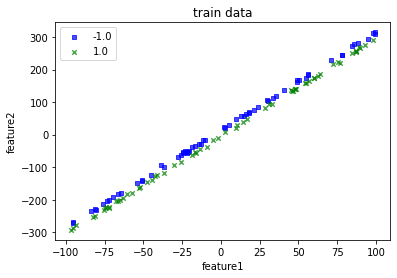

In [ ]:
from mlxtend.plotting import category_scatter
train_data = pd.concat([X_train, y_train], axis=1)
fig = category_scatter(x='feature1', y='feature2', label_col='label',data=train_data, legend_loc='upper left')
plt.title('train data')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.show()

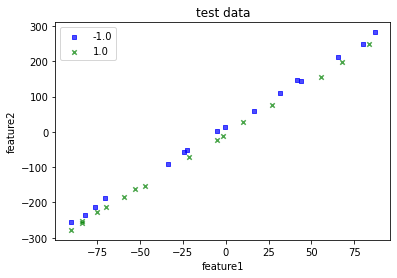

In [ ]:
test_data = pd.concat([X_test, y_test], axis=1)
fig = category_scatter(x='feature1', y='feature2', label_col='label',data=test_data, legend_loc='upper left')
plt.title('test data')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.show()

## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Let's convert y from pandas dataframe to numpy array with `np.ravel`.

In [ ]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
print(f'y_train shape: {y_train.shape} | y_test.shape: {y_test.shape}') 

y_train shape: (128,) | y_test.shape: (32,)


## Dimentionality reduction using LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [ ]:
lda.get_params()

{'covariance_estimator': None,
 'n_components': 1,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [ ]:
print(f'X_train shape after LDA : {X_train_lda.shape}')
print(f'X_test shape after LDA : {X_test_lda.shape}')

X_train shape after LDA : (128, 1)
X_test shape after LDA : (32, 1)


In [ ]:
coeff = lda.coef_
intercept = lda.intercept_
print(f'w1 and w2 : {coeff} and bias : {intercept}')

w1 and w2 : [[ 386.49765687 -386.96635858]] and bias : [-3.55271368e-15]


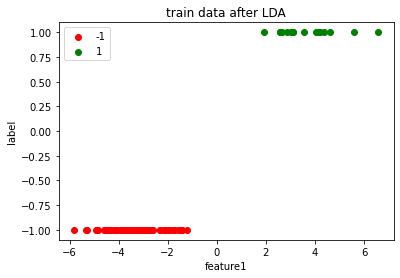

In [ ]:
# plot train data
plt.scatter(X_train_lda[y_train==-1, 0],y_train[y_train==-1], color=['red'], label='-1') 
plt.scatter(X_test_lda[y_test==1, 0],y_test[y_test==1], color=['green'], label='1')
plt.title('train data after LDA')
plt.xlabel('feature1')
plt.ylabel('label')
plt.legend(loc='upper left')
plt.show()

### Perceptron Classifier

In [ ]:
from sklearn.linear_model import Perceptron

perceptron_clf = Perceptron(tol=1e-3, random_state=0)
perceptron_clf.fit(X_train_lda, y_train)
train_acc = perceptron_clf.score(X_train_lda, y_train)

print(f'Accuracy on train data : {train_acc*100}% and Error on train: {(1-train_acc)*100}%' )

Accuracy on train data : 100.0% and Error on train: 0.0%


In [ ]:
y_pred = perceptron_clf.predict(X_test_lda)
test_acc = perceptron_clf.score(X_test_lda, y_test)
print(f'Accuracy on test data : {test_acc*100}% and Error : {(1-test_acc)*100}%' )

Accuracy on test data : 100.0% and Error : 0.0%


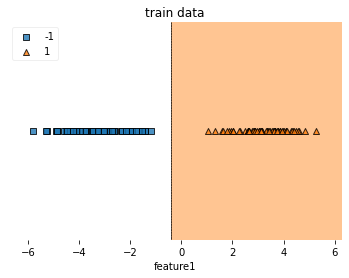

In [ ]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train_lda, y_train.astype(np.int_), clf=perceptron_clf, legend=2)
plt.title('train data')
plt.xlabel('feature1')
plt.show()

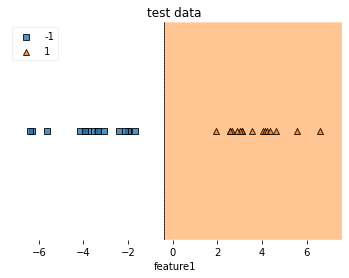

In [ ]:
plot_decision_regions(X_test_lda, y_test.astype(np.int_), clf=perceptron_clf, legend=2)
plt.title('test data')
plt.xlabel('feature1')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        16
         1.0       1.00      1.00      1.00        16

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



### Dimentionality reduction using PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, random_state=0)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 1,
 'random_state': 0,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [ ]:
print(f'pc1 : {pca.components_}')
print(f'variance of pc1: {pca.explained_variance_}')
print(f'percentage of variance explained by pc1 : {pca.explained_variance_ratio_}')

pc1 : [[-0.70710678 -0.70710678]]
variance of pc1: [2.01412836]
percentage of variance explained by pc1 : [0.99919649]


In [ ]:
print(f'X_train shape after PCA : {X_train_pca.shape}')
print(f'X_test shape after PCA : {X_test_pca.shape}')

X_train shape after PCA : (128, 1)
X_test shape after PCA : (32, 1)


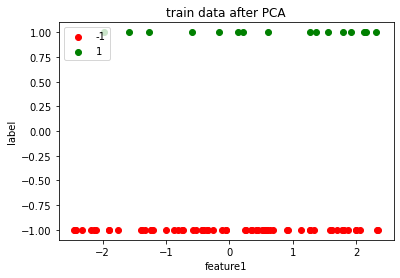

In [ ]:
# plot train data after using pca
plt.scatter(X_train_pca[y_train==-1, 0],y_train[y_train==-1], color=['red'], label='-1') 
plt.scatter(X_test_pca[y_test==1, 0],y_test[y_test==1], color=['green'], label='1')
plt.title('train data after PCA')
plt.xlabel('feature1')
plt.ylabel('label')
plt.legend(loc='upper left')
plt.show()

### Perceptron Classifier

In [ ]:
perceptron_clf = Perceptron(tol=1e-3, random_state=0)
perceptron_clf.fit(X_train_pca, y_train)
train_acc = perceptron_clf.score(X_train_pca, y_train)

print(f'Accuracy on train data : {train_acc*100}% and Error on train: {(1-train_acc)*100}%' )

Accuracy on train data : 50.0% and Error on train: 50.0%


In [ ]:
y_pred = perceptron_clf.predict(X_test_pca)
test_acc = perceptron_clf.score(X_test_pca, y_test)
print(f'Accuracy on test data : {test_acc*100}% and Error : {(1-test_acc)*100}%')

Accuracy on test data : 43.75% and Error : 56.25%


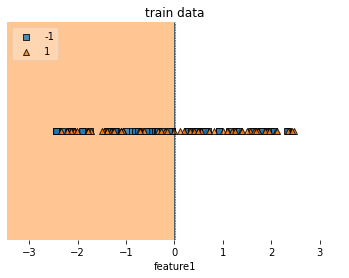

In [ ]:
plot_decision_regions(X_train_pca, y_train.astype(np.int_), clf=perceptron_clf, legend=2)
plt.title('train data')
plt.xlabel('feature1')
plt.show()

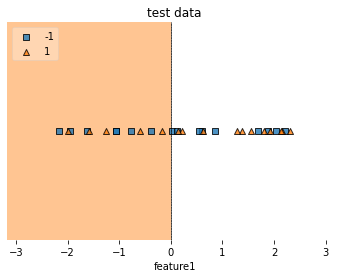

In [ ]:
plot_decision_regions(X_test_pca, y_test.astype(np.int_), clf=perceptron_clf, legend=2)
plt.title('test data')
plt.xlabel('feature1')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.45      0.56      0.50        16
         1.0       0.42      0.31      0.36        16

    accuracy                           0.44        32
   macro avg       0.43      0.44      0.43        32
weighted avg       0.43      0.44      0.43        32

